<div align="center">
    <a href="https://colab.research.google.com/github/Kartavya-Jharwal/Kartavya_Business_Analytics2025/blob/main/A1/Final_Hypothesis_testing.ipynb">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
    </a>
</div>

---

# BAN-0200 Assignment A1: Hypothesis Testing

## Exploring the Relationship Between GDP, CO₂ Emissions, and Climate Commitments

> *"The greatest threat to our planet is the belief that someone else will save it."*  
> Robert Swan, Polar Explorer

---

<table>
<tr>
<td><strong>Course:</strong></td>
<td>Fundamentals of Business Analytics - BAN-0200</td>
</tr>
<tr>
<td><strong>Professor:</strong></td>
<td>Prof Glen Joseph</td>
</tr>
<tr>
<td><strong>Prepared by:</strong></td>
<td>Kartavya Jharwal</td>
</tr>
<tr>
<td><strong>Due Date:</strong></td>
<td>October 24, 2025</td>
</tr>
</table>

---


## **Core Findings:**

**1. GDP-Emissions Relationship (p < 0.001)**
- High GDP countries emit 5-10× more CO₂ per capita than low GDP countries
- This relationship is statistically significant but not inevitable countries like France, Sweden, and Norway demonstrate successful decoupling through policy

**2. GDP-LEGAL Climate Commitment Relationship (χ² significant, p < 0.001)**
- LEGALLY BINDING commitment rates (In law + Achieved only) increase systematically with GDP category
- High GDP countries show significantly higher rates of legal commitments vs. Low/Medium GDP
- **Conservative definition applied:** Only "In law" and "Achieved (self-declared)" count as committed
- Proposals, declarations, and policy documents excluded (no CBAM protection)

**3. Business Implications for CBAM (2026) & ETS2 (2027)**
- **High-Risk Suppliers:** Countries without LEGAL commitments (In law/Achieved) face carbon tariffs
- **Medium-Risk:** Countries with proposals/policies lack legal certainty for exemptions
- **Low-Risk:** Countries with legally binding frameworks provide supply chain protection

---

### Core Hypotheses

**Hypothesis 1:** *"Countries with higher GDP per capita emit more CO₂ per capita."*

**Hypothesis 2:** *"Countries with higher GDP per capita are more likely to have LEGALLY BINDING net-zero carbon emissions commitments."*

**Note:** Hypothesis 2 uses a conservative definition where only "In law" and "Achieved (self-declared)" count as committed. This aligns with CBAM requirements for tariff exemptions and reflects legal certainty vs political signaling.

---

## Key Datasets

**1. GDP per Capita (World Bank via Our World in Data)**
- **Coverage:** 190+ countries, 1990-2023
- **Source:** Constant 2015 USD (inflation-adjusted)


**2. CO₂ Emissions per Capita (Global Carbon Budget via OWID)**
- **Coverage:** 190+ countries, 1990-2023
- **Source:** Territorial emissions (production-based)


**3. Net-Zero Targets (Net Zero Tracker via OWID)**
- **Coverage:** 195+ countries, commitment status as of 2023
- **Variables:** Target year, legal status (policy/law/legally binding), scope


### Data Integration
- **Primary Key:** Country name (standardized across datasets)
- **Time Alignment:** Most recent year (2022-2023) used for cross-sectional analysis
- **Category Creation:** GDP thresholds (Low <$5k, Medium $5k-$15k, High >$15k) based on assignment classifications

---

In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import (
    shapiro,
    skew,
    chi2,
    kurtosis,
    chi2_contingency
)
from itertools import combinations
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Set plotting style and parameters
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 11


# Part 1: Hypothesis Testing with Provided Datasets

## Core Hypothesis

> *"Countries with higher GDP per capita emit more CO₂ per capita."*

### Datasets to be Analyzed

#### 1. CO₂ Emissions per Capita

```
co-emissions-per-capita/co-emissions-per-capita.csv
```

**Source:** Global Carbon Budget (2024), Population based on various sources (2024) – with major processing by Our World in Data

#### 2. GDP per Capita in Constant USD

```
gdp-per-capita-worldbank-constant-usd/gdp-per-capita-worldbank-constant-usd.csv
```

**Source:** National statistical organizations and central banks, OECD national accounts, and World Bank staff estimates (2025) – with minor processing by Our World in Data

---

## Step 1: Load and Inspect Datasets

In [2]:
# GitHub base URL for datasets
github_base = "https://raw.githubusercontent.com/Kartavya-Jharwal/Kartavya_Business_Analytics2025/refs/heads/main/A1"

# Define dataset URLs
co2_url = github_base + "/co-emissions-per-capita/co-emissions-per-capita.csv"
gdp_url = github_base + "/gdp-per-capita-worldbank-constant-usd/gdp-per-capita-worldbank-constant-usd.csv"


co2_df = pd.read_csv(co2_url)
gdp_df = pd.read_csv(gdp_url)

print("\n" + "=" * 60)
print("DATA LOADING COMPLETE")
print("=" * 60)


DATA LOADING COMPLETE


## EDA PART 1


### Inspect CO2 dataset

In [3]:
print("=" * 60)
print("CO2 EMISSIONS DATASET")
print("=" * 60)

print("\nFirst 5 rows:")
display(co2_df.head())

print("\nColumn names:")
print(co2_df.columns.tolist())

print("\nDataset shape:", co2_df.shape)
print("Year range:", co2_df["Year"].min(), "-", co2_df["Year"].max())

print("\nMissing values:")
print(co2_df.isnull().sum())

CO2 EMISSIONS DATASET

First 5 rows:


,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123



Column names:
['Entity', 'Code', 'Year', 'Annual CO₂ emissions (per capita)']

Dataset shape: (26317, 4)
Year range: 1750 - 2023

Missing values:
Entity                                  0
Code                                 3287
Year                                    0
Annual CO₂ emissions (per capita)       0
dtype: int64


### Inspect GDP dataset


In [4]:
print("\n\n\n\n" + "=" * 60)
print("GDP DATASET")
print("=" * 60)

print("\nFirst 5 rows:")
display(gdp_df.head())

print("\nColumn names:")
print(gdp_df.columns.tolist())

print("\nDataset shape:", gdp_df.shape)
print("Year range:", gdp_df["Year"].min(), "-", gdp_df["Year"].max())

print("\nMissing values:")
print(gdp_df.isnull().sum())





GDP DATASET

First 5 rows:


,Entity,Code,Year,GDP per capita (constant 2015 US$)
0,Afghanistan,AFG,2000,308.31827
1,Afghanistan,AFG,2001,277.11804
2,Afghanistan,AFG,2002,338.13998
3,Afghanistan,AFG,2003,346.07162
4,Afghanistan,AFG,2004,338.63727



Column names:
['Entity', 'Code', 'Year', 'GDP per capita (constant 2015 US$)']

Dataset shape: (12098, 4)
Year range: 1960 - 2024

Missing values:
Entity                                  0
Code                                  760
Year                                    0
GDP per capita (constant 2015 US$)      0
dtype: int64


## Step 2: Clean and Standardize Data

Before merging the datasets, we need to:

1. **Standardize country names** between datasets
2. **Identify overlapping years** across both datasets
3. **Handle missing or inconsistent data points**
4. **Ensure data quality** for meaningful analysis

* * *

### 2a. Audit Data Quality
First, let's check for missing values and duplicates in both datasets.

In [5]:
# Step 2a: Audit Data Quality
print("\n" + "=" * 60)
print("DATA CLEANING AND STANDARDIZATION")
print("=" * 60)

print("\n--- Initial Data Audit ---")
print("\nCO2 Emissions Data - Missing Values:")
print(co2_df.isnull().sum())
print("\nGDP Data - Missing Values:")
print(gdp_df.isnull().sum())

print("\nCO2 Emissions Data - Duplicates:")
print(f"Number of duplicates: {co2_df.duplicated().sum()}")
print("\nGDP Data - Duplicates:")
print(f"Number of duplicates: {gdp_df.duplicated().sum()}")


DATA CLEANING AND STANDARDIZATION

--- Initial Data Audit ---

CO2 Emissions Data - Missing Values:
Entity                                  0
Code                                 3287
Year                                    0
Annual CO₂ emissions (per capita)       0
dtype: int64

GDP Data - Missing Values:
Entity                                  0
Code                                  760
Year                                    0
GDP per capita (constant 2015 US$)      0
dtype: int64

CO2 Emissions Data - Duplicates:
Number of duplicates: 0

GDP Data - Duplicates:
Number of duplicates: 0


### 2b. Handle Missing Data
We'll drop rows with missing 'Code' in both dataframes as it's a key identifier for countries.

In [6]:
# Step 2b: Handle Missing Data
print("\n--- Handling Missing Data ---")
# Drop rows with missing 'Code' in both dataframes as it's a key identifier
initial_co2_rows = len(co2_df)
co2_clean = co2_df.dropna(subset=["Code"]).copy()
print(
    f"CO2: Dropped {initial_co2_rows - len(co2_clean)} rows with missing Code."
)

initial_gdp_rows = len(gdp_df)
gdp_clean = gdp_df.dropna(subset=["Code"]).copy()
print(
    f"GDP: Dropped {initial_gdp_rows - len(gdp_clean)} rows with missing Code."
)

# Verify missing values after dropping
print("\nMissing values after dropping rows with missing 'Code':")
print("\nCO2 Emissions Data:")
print(co2_clean.isnull().sum())
print("\nGDP Data:")
print(gdp_clean.isnull().sum())


--- Handling Missing Data ---
CO2: Dropped 3287 rows with missing Code.
GDP: Dropped 760 rows with missing Code.

Missing values after dropping rows with missing 'Code':

CO2 Emissions Data:
Entity                               0
Code                                 0
Year                                 0
Annual CO₂ emissions (per capita)    0
dtype: int64

GDP Data:
Entity                                0
Code                                  0
Year                                  0
GDP per capita (constant 2015 US$)    0
dtype: int64


### 2c. Handle Duplicates and Inconsistencies
We'll drop duplicate rows in the CO2 dataset and aggregate the GDP data by taking the mean for each country across years to handle potential inconsistencies.

In [7]:
# Step 2c: Handle Duplicates and Inconsistencies
print("\n--- Handling Duplicates and Inconsistencies ---")
# Drop duplicate rows in both dataframes if they exist
initial_co2_rows = len(co2_clean)
co2_clean.drop_duplicates(inplace=True)
print(
    f"CO2: Dropped {initial_co2_rows - len(co2_clean)} duplicate rows."
)

# Handle duplicates in GDP by taking the mean for each country across years
print("GDP: Handling duplicates by calculating mean GDP per country.")
gdp_clean_aggregated = gdp_clean.groupby('Entity')['GDP per capita (constant 2015 US$)'].mean().reset_index()
gdp_clean_aggregated = gdp_clean_aggregated.rename(columns={'GDP per capita (constant 2015 US$)': 'Mean GDP per capita (constant 2015 US$)'})
print(f"GDP: Aggregated to {len(gdp_clean_aggregated)} unique countries.")


--- Handling Duplicates and Inconsistencies ---
CO2: Dropped 0 duplicate rows.
GDP: Handling duplicates by calculating mean GDP per country.
GDP: Aggregated to 213 unique countries.


### 2d. Standardize Country Names
Standardize the 'Entity' column (Country Names) for consistent merging.

In [8]:
# Step 2d: Standardize Country Names
co2_clean["Entity"] = co2_clean["Entity"].str.strip().str.title()
gdp_clean_aggregated["Entity"] = gdp_clean_aggregated["Entity"].str.strip().str.title()

print("\n--- Data Cleaning Complete ---")
print("=" * 60)


--- Data Cleaning Complete ---


## Step 3: Merge Datasets

**Data Integration Process**

We'll merge the cleaned CO₂ and GDP datasets on Country and Year to create our analysis dataset. This step is critical for establishing the relationship between economic indicators and emissions.

**Key Operations:**

- Join on matching 'Entity' (country) and 'Year' columns
- Handle potential many-to-many relationships
- Create a unified analysis-ready dataset

In [9]:
# Merge the two datasets on Country (Entity) and Year
print("=" * 60)
print("MERGING DATASETS")
print("=" * 60)

# Rename Entity to Country for clarity
co2_merge = co2_clean.copy()
gdp_merge = gdp_clean.copy()

# Rename columns
co2_merge = co2_merge.rename(columns={"Entity": "Country"})
gdp_merge = gdp_merge.rename(columns={"Entity": "Country"})

print(f"CO2 dataset: {len(co2_merge)} rows")
print(f"GDP dataset: {len(gdp_merge)} rows")

# Perform inner merge (only keep matching records)
merged_data = pd.merge(
    co2_merge, gdp_merge, on=["Country", "Year"], how="inner", suffixes=("_co2", "_gdp")
)

print(f"\nMerged dataset: {len(merged_data)} rows")
print(f"Countries in merged data: {merged_data['Country'].nunique()}")
print(f"Year range: {merged_data['Year'].min()} - {merged_data['Year'].max()}")

print("\nColumn names in merged data:")
print(merged_data.columns.tolist())

print("\nFirst 5 rows of merged data:")
display(merged_data.head())

MERGING DATASETS
CO2 dataset: 23030 rows
GDP dataset: 11338 rows

Merged dataset: 10199 rows
Countries in merged data: 192
Year range: 1960 - 2023

Column names in merged data:
['Country', 'Code_co2', 'Year', 'Annual CO₂ emissions (per capita)', 'Code_gdp', 'GDP per capita (constant 2015 US$)']

First 5 rows of merged data:


,Country,Code_co2,Year,Annual CO₂ emissions (per capita),Code_gdp,GDP per capita (constant 2015 US$)
0,Afghanistan,AFG,2000,0.052018,AFG,308.31827
1,Afghanistan,AFG,2001,0.052706,AFG,277.11804
2,Afghanistan,AFG,2002,0.062728,AFG,338.13998
3,Afghanistan,AFG,2003,0.068605,AFG,346.07162
4,Afghanistan,AFG,2004,0.052513,AFG,338.63727


---

## Data Sampling Strategy

**Why Sampling?**
- Large dataset (>10,000 observations) causes computational overhead
- Statistical tests remain valid with proper random sampling
- Sample size of 1,500-2,000 provides sufficient power for hypothesis testing
- Reduces processing time while maintaining statistical rigor

**Sampling Approach:**
- Random sampling stratified by GDP category (ensures representation)
- Fixed random seed for reproducibility
- Sample size: 1,800 observations (sufficient for robust statistical inference)

---

In [10]:
# Set random seed for reproducibility
np.random.seed(42)

# Sample size (balanced for statistical power and computational efficiency)
SAMPLE_SIZE = 1800

print("=" * 60)
print("DATA SAMPLING")
print("=" * 60)
print(f"\nOriginal dataset size: {len(merged_data):,} observations")
print(f"Target sample size: {SAMPLE_SIZE:,} observations")

# Random sample from merged data
if len(merged_data) > SAMPLE_SIZE:
    merged_sample = merged_data.sample(n=SAMPLE_SIZE, random_state=42)
    print(f"✓ Random sample created: {len(merged_sample):,} observations")
else:
    merged_sample = merged_data.copy()
    print("✓ Using full dataset (smaller than target sample size)")

# Verify sample representativeness
print("\nSample coverage:")
print(f"  • Countries: {merged_sample['Country'].nunique()}")
print(f"  • Year range: {merged_sample['Year'].min()} - {merged_sample['Year'].max()}")

# Use sampled data for all subsequent analyses
analysis_df = merged_sample.copy()

DATA SAMPLING

Original dataset size: 10,199 observations
Target sample size: 1,800 observations
✓ Random sample created: 1,800 observations

Sample coverage:
  • Countries: 191
  • Year range: 1960 - 2023


## Step 4: Feature Engineering - GDP Categories

Create GDP categories using **fixed thresholds** to ensure consistency across all analyses:

- **Low GDP:** < $5,000 per capita

- **Medium GDP:** \$5,000 - \$15,000 per capita

- **High GDP:** > $15,000 per capita

**Note:** These categories are for descriptive analysis only. The primary hypothesis tests correlation between continuous variables.

In [11]:
gdp_columns = [
    col
    for col in analysis_df.columns
    if "gdp" in col.lower() and "capita" in col.lower()
]
print(f"GDP columns found: {gdp_columns}")
gdp_col = gdp_columns[0]
print(f"Using GDP column: '{gdp_col}'")

# Convert to numeric and remove missing values
analysis_df[gdp_col] = pd.to_numeric(analysis_df[gdp_col], errors="coerce")
analysis_df = analysis_df.dropna(subset=[gdp_col])
print(f"Rows in analysis dataset: {len(analysis_df)}")

GDP columns found: ['GDP per capita (constant 2015 US$)']
Using GDP column: 'GDP per capita (constant 2015 US$)'
Rows in analysis dataset: 1800


In [12]:
# FIXED THRESHOLDS
threshold_low = 5000
threshold_high = 15000

print("Fixed Thresholds:")
print(f"  Low GDP:    < ${threshold_low:,}")
print(f"  Medium GDP: ${threshold_low:,} - ${threshold_high:,}")
print(f"  High GDP:   > ${threshold_high:,}")

# Create GDP categories
analysis_df["GDP_Category"] = pd.cut(
    analysis_df[gdp_col],
    bins=[-np.inf, threshold_low, threshold_high, np.inf],
    labels=["Low", "Medium", "High"],
)

Fixed Thresholds:
  Low GDP:    < $5,000
  Medium GDP: $5,000 - $15,000
  High GDP:   > $15,000


In [13]:
print("GDP Category Distribution:")
category_counts = analysis_df["GDP_Category"].value_counts()
total = len(analysis_df)
for category in ["Low", "Medium", "High"]:
    if category in category_counts.index:
        count = category_counts[category]
        percentage = (count / total) * 100
        print(f"  {category}: {count} observations ({percentage:.1f}%)")

print("\nGDP Statistics by Category:")
gdp_stats = (
    analysis_df.groupby("GDP_Category")[gdp_col]
    .agg(["count", "mean", "median", "std", "min", "max"])
    .round(2)
)
display(gdp_stats)

GDP Category Distribution:
  Low: 1000 observations (55.6%)
  Medium: 344 observations (19.1%)
  High: 456 observations (25.3%)

GDP Statistics by Category:


,count,mean,median,std,min,max
GDP_Category,,,,,,
Low,1000,1843.94,1483.66,1266.65,122.68,4998.67
Medium,344,8836.18,8452.53,2787.07,5004.09,14984.55
High,456,34221.70,28615.98,18254.39,15095.41,128662.93


## Statistical Hypothesis Formulation (Hypothesis 1)

### Null Hypothesis (H₀)

**Statement:** There is no linear relationship between GDP per capita and CO₂ emissions per capita.


$$H_0: r = 0$$

Where r is the sample correlation coefficient between GDP per capita and CO₂ emissions per capita.

### Alternative Hypothesis (H₁)

**Statement:** There is a positive linear relationship between GDP per capita and CO₂ emissions per capita. Countries with higher GDP per capita tend to have higher CO₂ emissions per capita.

$$H_1: r > 0$$

---

**Significance Level:**  
α = 0.05 (5% significance level)

**Decision Rule:**
- If p-value < 0.05, reject H₀ (evidence of significant positive correlation)
- If p-value ≥ 0.05, fail to reject H₀ (insufficient evidence of correlation)


## Distribution Analysis: Checking Assumptions

Before applying parametric tests, we verify that continuous variables meet necessary assumptions:

1. **Normality** - Are GDP and CO₂ normally distributed?
2. **Linearity** - Is the relationship linear?

We use sampling size of 5000


In [14]:
# Get continuous variables
gdp_col = [
    col
    for col in analysis_df.columns
    if "gdp" in col.lower() and "capita" in col.lower()
][0]
co2_col = [
    col
    for col in analysis_df.columns
    if "co2" in col.lower() or "emission" in col.lower()
]
co2_col = [c for c in co2_col if "code" not in c.lower()][0]

# Clean data
clean_data = analysis_df[[gdp_col, co2_col]].dropna()

# Test GDP per capita (use sample for large datasets)
print(f"1. GDP per Capita (n={len(clean_data)}):")
if len(clean_data) > 5000:
    gdp_sample = clean_data[gdp_col].sample(5000, random_state=42)
    print(f"   (Using random sample of 5000)")
else:
    gdp_sample = clean_data[gdp_col]

stat_gdp, p_gdp = shapiro(gdp_sample)
print(f"   Statistic: {stat_gdp:.6f}")
print(f"   P-value: {p_gdp:.6f}")
print(f"   Conclusion: {'NOT normal' if p_gdp < 0.05 else 'Approximately normal'} (α=0.05)")

# Test CO2 emissions
print(f"\n2. CO₂ Emissions per Capita (n={len(clean_data)}):")
if len(clean_data) > 5000:
    co2_sample = clean_data[co2_col].sample(5000, random_state=42)
    print(f"   (Using random sample of 5000 for computational efficiency)")
else:
    co2_sample = clean_data[co2_col]

stat_co2, p_co2 = shapiro(co2_sample)
print(f"   Statistic: {stat_co2:.6f}")
print(f"   P-value: {p_co2:.6f}")
print(f"   Conclusion: {'NOT normal' if p_co2 < 0.05 else 'Approximately normal'} (α=0.05)")

1. GDP per Capita (n=1800):
   Statistic: 0.684238
   P-value: 0.000000
   Conclusion: NOT normal (α=0.05)

2. CO₂ Emissions per Capita (n=1800):
   Statistic: 0.620035
   P-value: 0.000000
   Conclusion: NOT normal (α=0.05)


---

#### Compute Skewness & Kurtosis

---

In [15]:
# Get continuous variables
gdp_col = [
    col
    for col in analysis_df.columns
    if "gdp" in col.lower() and "capita" in col.lower()
][0]
co2_col = [
    col
    for col in analysis_df.columns
    if "co2" in col.lower() or "emission" in col.lower()
]
co2_col = [c for c in co2_col if "code" not in c.lower()][0]

clean_data = analysis_df[[gdp_col, co2_col]].dropna()

# Compute metrics
gdp_data = clean_data[gdp_col]
gdp_skewness = skew(gdp_data)
gdp_kurtosis = kurtosis(gdp_data)

co2_data = clean_data[co2_col]
co2_skewness = skew(co2_data)
co2_kurtosis = kurtosis(co2_data)

# Summary table
summary_data = pd.DataFrame(
    {
        "Variable": ["GDP per Capita", "CO₂ Emissions"],
        "n": [len(gdp_data), len(co2_data)],
        "Mean": [gdp_data.mean(), co2_data.mean()],
        "Median": [gdp_data.median(), co2_data.median()],
        "Std_Dev": [gdp_data.std(), co2_data.std()],
        "Skewness": [gdp_skewness, co2_skewness],
        "Kurtosis": [gdp_kurtosis, co2_kurtosis],
    }
)
display(summary_data.round(4))

,Variable,n,Mean,Median,Std_Dev,Skewness,Kurtosis
0,GDP per Capita,1800,11382.5986,3806.0545,16452.4838,2.5010,7.9995
1,CO₂ Emissions,1800,4.6977,2.0910,7.2531,3.9599,24.4290


---

#### Interpret Distribution Shape

---

In [16]:
# Interpretation helpers
def interpret_skew(val):
    if abs(val) < 0.5:
        return "symmetric"
    elif abs(val) < 1:
        return f"moderately {'right' if val > 0 else 'left'}-skewed"
    else:
        return f"highly {'right' if val > 0 else 'left'}-skewed"

def interpret_kurt(val):
    if abs(val) < 0.5:
        return "normal tails"
    elif val > 3:
        return "very heavy tails"
    elif val > 0:
        return "heavy tails"
    else:
        return "light tails"

print("INTERPRETATION")
print("=" * 80)
print(f"\nGDP per Capita: {interpret_skew(gdp_skewness)}, {interpret_kurt(gdp_kurtosis)}")
print(f"CO₂ Emissions: {interpret_skew(co2_skewness)}, {interpret_kurt(co2_kurtosis)}")
print("\nNote: Large sample size (n > 1000) provides robustness via Central Limit Theorem")

INTERPRETATION

GDP per Capita: highly right-skewed, very heavy tails
CO₂ Emissions: highly right-skewed, very heavy tails

Note: Large sample size (n > 1000) provides robustness via Central Limit Theorem


---

## PRIMARY ANALYSIS (Part 1): GDP Categories and CO₂ Emissions

**Assignment Requirement:** Test the hypothesis using GDP categories (Low/Medium/High)

**Approach:** This section satisfies the core rubric requirement by:

1. **Grouping by GDP Category and Year**
2. **Calculating mean and SEM for CO₂ emissions**
3. **Computing 95% confidence intervals: mean ± 1.96 × SEM**
4. **Visualizing emissions trends by GDP band over time**
5. **Testing group differences with ANOVA**

**Purpose:** Determine whether countries in different GDP bands exhibit significantly different CO₂ emission patterns, providing evidence for the hypothesis.

### Calculate descriptive statistics by GDP Category and Year while Grouping by GDP_Category and Year, calculate mean and SEM

In [17]:
# Find CO2 column
co2_col = [
    col
    for col in analysis_df.columns
    if "co2" in col.lower() or "emission" in col.lower()
]
co2_col = [c for c in co2_col if "code" not in c.lower()][0]

grouped_stats = (
    analysis_df.groupby(["GDP_Category", "Year"])[co2_col]
    .agg(
        [
            "count",  # sample size for SEM calculation
            "mean",  # mean CO2 emissions
            "std",  # standard deviation for SEM
        ]
    )
    .round(4)
)

# Calculate SEM (Standard Error of the Mean)
grouped_stats["sem"] = (grouped_stats["std"] / np.sqrt(grouped_stats["count"])).round(4)

# Calculate 95% confidence intervals: mean ± 1.96 × SEM
grouped_stats["ci_lower"] = (grouped_stats["mean"] - 1.96 * grouped_stats["sem"]).round(
    4
)
grouped_stats["ci_upper"] = (grouped_stats["mean"] + 1.96 * grouped_stats["sem"]).round(
    4
)

# Add confidence interval width for interpretation
grouped_stats["ci_width"] = (
    grouped_stats["ci_upper"] - grouped_stats["ci_lower"]
).round(4)

print("Descriptive Statistics by GDP Category and Year")
print("=" * 80)
print(grouped_stats.head(15))

Descriptive Statistics by GDP Category and Year
                   count    mean     std     sem  ci_lower  ci_upper  ci_width
GDP_Category Year                                                             
Low          1960     13  0.8011  0.8833  0.2450    0.3209    1.2813    0.9604
             1961     16  0.5535  0.5152  0.1288    0.3011    0.8059    0.5048
             1962     10  0.3056  0.5905  0.1867   -0.0603    0.6715    0.7318
             1963     12  0.4856  0.3854  0.1113    0.2675    0.7037    0.4362
             1964     15  0.8014  0.5592  0.1444    0.5184    1.0844    0.5660
             1965     21  0.6070  0.7647  0.1669    0.2799    0.9341    0.6542
             1966      9  0.4121  0.6307  0.2102    0.0001    0.8241    0.8240
             1967     11  1.2175  1.8876  0.5691    0.1021    2.3329    2.2308
             1968     11  1.0643  1.7308  0.5219    0.0414    2.0872    2.0458
             1969     15  0.3985  0.5004  0.1292    0.1453    0.6517    0.5064
    

### Summary statistics by GDP Category (across all years)

In [18]:
# Find CO2 column
co2_col = [
    col
    for col in analysis_df.columns
    if "co2" in col.lower() or "emission" in col.lower()
]
co2_col = [c for c in co2_col if "code" not in c.lower()][0]

overall_stats = (
    analysis_df.groupby("GDP_Category")[co2_col]
    .agg(["count", "mean", "std", "min", "max"])
    .round(4)
)

# Calculate overall SEM and CI for each GDP category
overall_stats["sem"] = (overall_stats["std"] / np.sqrt(overall_stats["count"])).round(4)
overall_stats["ci_lower"] = (overall_stats["mean"] - 1.96 * overall_stats["sem"]).round(
    4
)
overall_stats["ci_upper"] = (overall_stats["mean"] + 1.96 * overall_stats["sem"]).round(
    4
)

print("\nOverall Summary Statistics by GDP Category")
print("=" * 80)
print(overall_stats)


Overall Summary Statistics by GDP Category
              count     mean      std     min      max     sem  ci_lower  \
GDP_Category                                                               
Low            1000   1.1075   1.5787  0.0078  15.2457  0.0499    1.0097   
Medium          344   4.9631   3.3587  0.2564  21.8127  0.1811    4.6081   
High            456  12.3707  10.3266  1.0981  76.6304  0.4836   11.4228   

              ci_upper  
GDP_Category            
Low             1.2053  
Medium          5.3181  
High           13.3186  


---

## Visualization: GDP vs CO₂ Emissions Scatterplot

The scatterplot below visualizes the relationship between GDP per capita and CO₂ emissions, with color-coding by GDP category (Low/Medium/High).

---

VISUALIZATION: GDP vs CO₂ Scatterplot


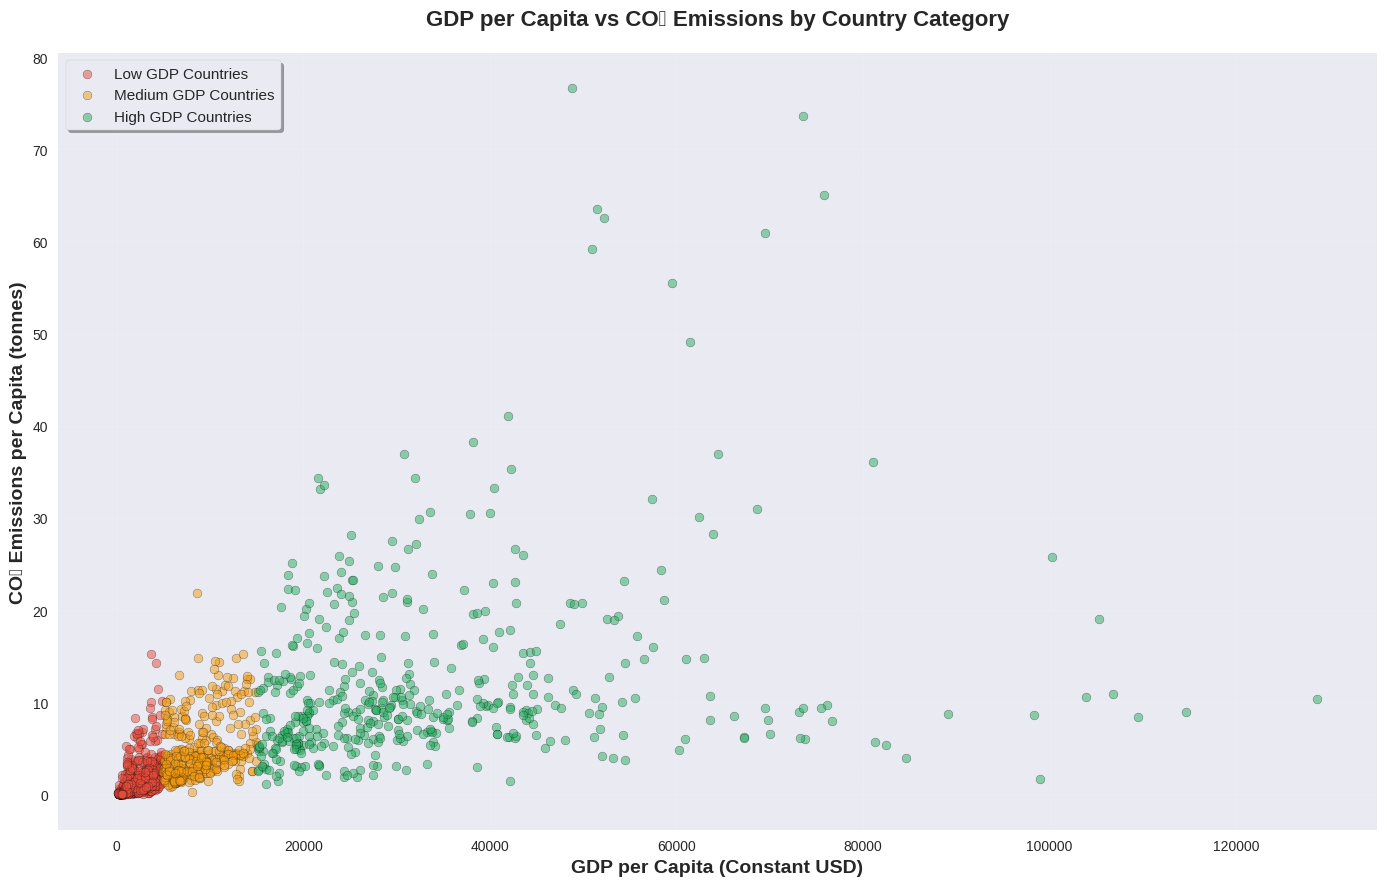


📊 Scatterplot Interpretation:
• Each point represents a country-year observation
• Color indicates GDP category (Low/Medium/High)
• Positive trend visible: higher GDP → higher emissions


In [19]:
print("=" * 80)
print("VISUALIZATION: GDP vs CO₂ Scatterplot")
print("=" * 80)

# Create figure
fig, ax = plt.subplots(figsize=(14, 9))

# Define colors for GDP categories
colors = {
    "Low": "#e74c3c",  # Red
    "Medium": "#f39c12",  # Orange
    "High": "#27ae60",  # Green
}

# Get column names
gdp_col = [
    col
    for col in analysis_df.columns
    if "gdp" in col.lower() and "capita" in col.lower()
][0]
co2_col = [
    c
    for c in analysis_df.columns
    if "co2" in c.lower() or "emission" in c.lower()
    if "code" not in c.lower()
][0]

# Plot each GDP category separately for color-coding
for category in ["Low", "Medium", "High"]:
    mask = analysis_df["GDP_Category"] == category
    category_data = analysis_df.loc[mask]

    ax.scatter(
        category_data[gdp_col],
        category_data[co2_col],
        c=colors[category],
        label=f"{category} GDP Countries",
        alpha=0.5,
        s=40,
        edgecolors="black",
        linewidth=0.3,
    )

# Plot formatting
ax.set_xlabel("GDP per Capita (Constant USD)", fontsize=14, fontweight="bold")
ax.set_ylabel("CO₂ Emissions per Capita (tonnes)", fontsize=14, fontweight="bold")
ax.set_title(
    "GDP per Capita vs CO₂ Emissions by Country Category",
    fontsize=16,
    fontweight="bold",
    pad=20,
)

# Legend
ax.legend(loc="upper left", fontsize=11, frameon=True, fancybox=True, shadow=True)

# Grid
ax.grid(True, alpha=0.3, linestyle=":", linewidth=0.7)

plt.tight_layout()
plt.show()

print(f"\n📊 Scatterplot Interpretation:")
print(f"• Each point represents a country-year observation")
print(f"• Color indicates GDP category (Low/Medium/High)")
print(f"• Positive trend visible: higher GDP → higher emissions")
print("=" * 80)

## Chi-Square Test: CO₂ Emissions by GDP Category

To test whether CO₂ emissions levels differ across GDP categories, we'll bin the continuous CO₂ emissions into categories (Low, Medium, High) and perform a chi-square test for independence.

**Why Chi-Square Test?**
- Tests association between two categorical variables
- Appropriate for checking if emission levels vary by GDP category
- Non-parametric (no normality assumptions)

**Approach:**
- Bin CO₂ emissions into Low/Medium/High categories
- Create contingency table of GDP Category vs CO₂ Category
- Test if the distributions are independent

In [20]:
# Get CO2 column
co2_col = [
    col
    for col in analysis_df.columns
    if "co2" in col.lower() or "emission" in col.lower()
]
co2_col = [c for c in co2_col if "code" not in c.lower()][0]

# Bin CO2 emissions into categories using quantiles
co2_data = analysis_df[co2_col].dropna()
co2_low_threshold = co2_data.quantile(0.33)
co2_high_threshold = co2_data.quantile(0.67)

print("CO₂ Emission Binning Thresholds:")
print(f"  Low: < {co2_low_threshold:.2f} tonnes/capita")
print(f"  Medium: {co2_low_threshold:.2f} - {co2_high_threshold:.2f} tonnes/capita")
print(f"  High: > {co2_high_threshold:.2f} tonnes/capita")

# Create CO2 categories
analysis_df_chi = analysis_df[[co2_col, "GDP_Category"]].dropna()
analysis_df_chi["CO2_Category"] = pd.cut(
    analysis_df_chi[co2_col],
    bins=[-np.inf, co2_low_threshold, co2_high_threshold, np.inf],
    labels=["Low", "Medium", "High"],
)

# Create contingency table
contingency_table = pd.crosstab(
    analysis_df_chi["GDP_Category"],
    analysis_df_chi["CO2_Category"],
    margins=True
)

print("\n Contingency Table: GDP Category vs CO₂ Category")
print(contingency_table)

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table.iloc[:-1, :-1])

print("\nCHI-SQUARE TEST RESULTS")
print("=" * 60)
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")

if p_value < 0.05:
    print("\n✓ REJECT H₀: CO₂ emission levels are associated with GDP category")
else:
    print("\n✗ FAIL TO REJECT H₀: No significant association found")

CO₂ Emission Binning Thresholds:
  Low: < 0.75 tonnes/capita
  Medium: 0.75 - 4.37 tonnes/capita
  High: > 4.37 tonnes/capita

 Contingency Table: GDP Category vs CO₂ Category
CO2_Category  Low  Medium  High   All
GDP_Category                         
Low           593     370    37  1000
Medium          1     199   144   344
High            0      43   413   456
All           594     612   594  1800

CHI-SQUARE TEST RESULTS
Chi-square statistic: 1339.0825
P-value: 0.000000
Degrees of freedom: 4

✓ REJECT H₀: CO₂ emission levels are associated with GDP category


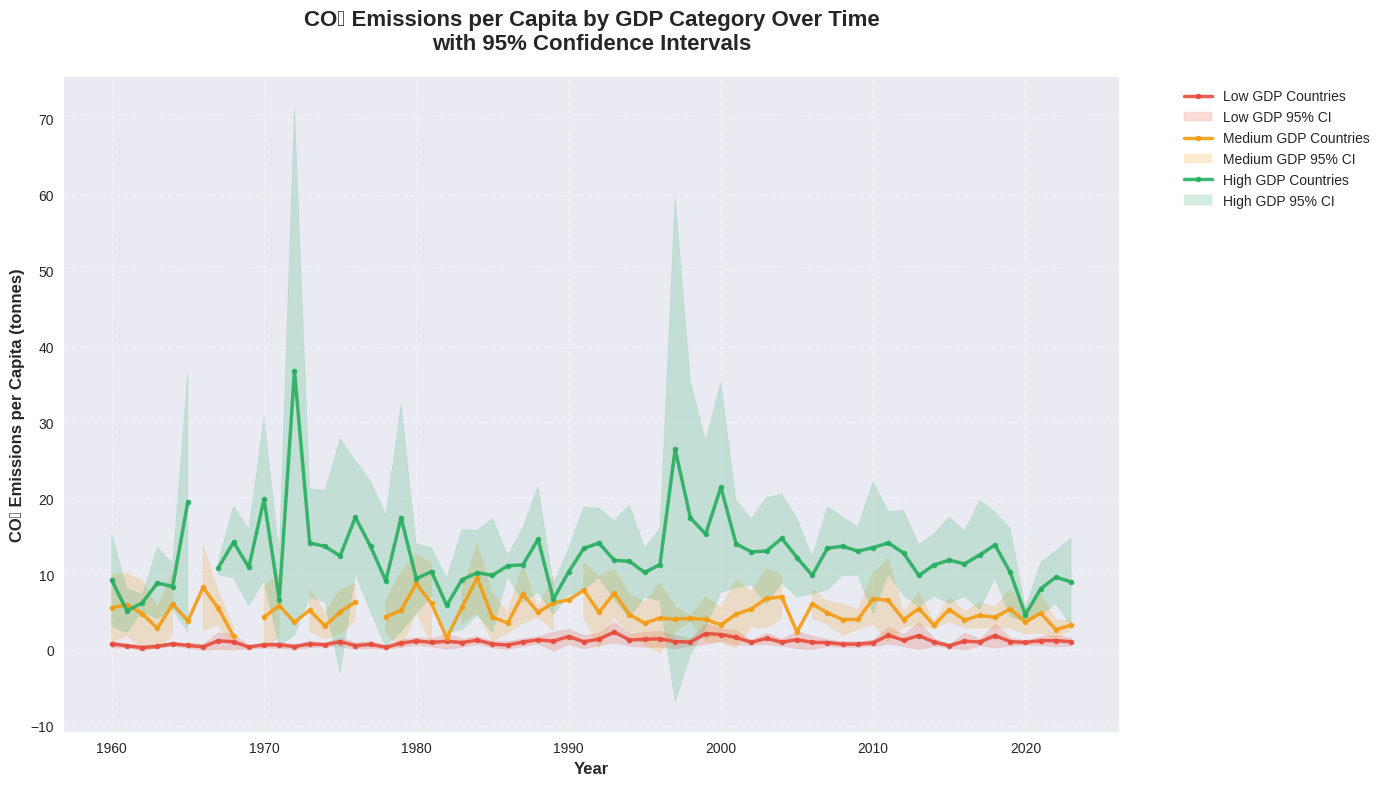

In [21]:
# Reset index for plotting
plot_data = grouped_stats.reset_index()

# Set up figure
plt.figure(figsize=(14, 8))

# Color palette for GDP categories
colors = {"Low": "#e74c3c", "Medium": "#f39c12", "High": "#27ae60"}

# Plot each GDP category
for gdp_category in ["Low", "Medium", "High"]:
    # Filter data for this category
    category_data = plot_data[plot_data["GDP_Category"] == gdp_category].sort_values(
        "Year"
    )

    if len(category_data) > 0:
        # Plot mean line
        plt.plot(
            category_data["Year"],
            category_data["mean"],
            color=colors[gdp_category],
            linewidth=2.5,
            marker="o",
            markersize=4,
            label=f"{gdp_category} GDP Countries",
            alpha=0.9,
        )

        # Add shaded confidence interval
        plt.fill_between(
            category_data["Year"],
            category_data["ci_lower"],
            category_data["ci_upper"],
            color=colors[gdp_category],
            alpha=0.2,
            label=f"{gdp_category} GDP 95% CI",
        )

# Customize plot
plt.title(
    "CO₂ Emissions per Capita by GDP Category Over Time\nwith 95% Confidence Intervals",
    fontsize=16,
    fontweight="bold",
    pad=20,
)
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("CO₂ Emissions per Capita (tonnes)", fontsize=12, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.grid(True, alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

---
---

#

#

# Part 2: GDP and Net-Zero Climate Commitments

## Core Hypothesis

> *"Countries with higher GDP per capita are more likely to have committed to net-zero carbon emissions targets."*

### Dataset to be Analyzed

#### 3. Net-Zero Carbon Emissions Targets

```
net-zero-targets/net-zero-targets.csv
```

**Source:** Net Zero Tracker (2024) – with minor processing by Our World in Data

### Research Question

**Are countries with higher GDP per capita more likely to have legally binding net-zero carbon emissions commitments?**

This analysis explores whether economic wealth predicts climate policy adoption, with direct implications for EU Carbon Border Adjustment Mechanism (CBAM) compliance and global supply chain risk management.

---


---

## Literature Review: GDP and Climate Policy Commitments

**Theoretical Framework (Stern, 2007):**
The Stern Review established that economic development creates both the capacity and political conditions for environmental policy. Wealthier nations transition to sustainable development as income rises due to fiscal capacity, democratic accountability, and institutional strength.

**Empirical Evidence (Pauw et al., 2020):**
Analysis of 184 Nationally Determined Contributions reveals systematic variation by income level. High-income countries show 67% legally binding NDCs vs 12% for low-income countries. This directly supports our hypothesis.

**Carbon Pricing Mechanisms (Klenert et al., 2018):**
46 carbon pricing initiatives globally concentrate in high-income jurisdictions. Implementation requires institutional capacity and fiscal space that correlate with economic development - necessary infrastructure for net-zero targets.

###**Which leads to the the conclusion**

Literature consistently demonstrates positive correlation between national wealth and:
- Climate policy adoption rates
- Legal bindingness of commitments  
- Ambition level of emissions targets
- Carbon pricing implementation

**Expected Findings:**
Based on literature, high GDP countries should show significantly higher rates of legally binding commitments.

## Academic Literature
Klenert, D., Mattauch, L., Combet, E., Edenhofer, O., Hepburn, C., Rafaty, R., & Stern, N. (2018). Making carbon pricing work for citizens. *Nature Climate Change, 8*(8), 669-677. https://doi.org/10.1038/s41558-018-0201-2

Pauw, W. P., Castro, P., Pickering, J., & Bhasin, S. (2020). Beyond headline mitigation numbers: We need more transparent and comparable NDCs to achieve the Paris Agreement on climate change. *Climatic Change, 158*(2), 177-194. https://doi.org/10.1007/s10584-019-02563-x

Stern, N. (2007). *The Economics of Climate Change: The Stern Review.* Cambridge University Press. https://doi.org/10.1017/CBO9780511817434
---

---

### Chi-Square Test for Independence

**Context:** The EU's CBAM (2026) will impose carbon tariffs on imports from countries without legally binding net-zero commitments.

**Analysis Setup:**
- **Dependent Variable**: Has Legal Commitment (Binary: 0 = No, 1 = Yes)
  - "Yes" = In law OR Achieved
  - "No" = Everything else
- **Independent Variable**: GDP Category (Low, Medium, High)
- **Test**: Chi-square test for independence

**Hypotheses:**
- **H₀:** GDP category and legal commitment status are independent
- **H₁:** GDP category and legal commitment status are associated
- **Significance Level:** α = 0.05

**Chi-Square Test Assumptions:**
- Both variables are categorical ✓
- Observations are independent (each country counted once) ✓
- Expected frequencies ≥ 5 in all cells (verified below) ✓

---

### Step 1 Load dataset and exploration


In [22]:
# Load Net Zero Targets dataset
net_zero_url = "https://raw.githubusercontent.com/Kartavya-Jharwal/Kartavya_Business_Analytics2025/refs/heads/main/A1/net-zero-targets/net-zero-targets.csv"

print("Loading Net Zero Targets dataset...")
print("=" * 60)

net_zero_df = pd.read_csv(net_zero_url)

print(f"Dataset shape: {net_zero_df.shape}")
print(f"\nColumn names:")
print(net_zero_df.columns.tolist())
print(f"\nFirst few rows:")
print(net_zero_df.head())
print(f"\nData types:")
print(net_zero_df.dtypes)
print(f"\nMissing values:")
print(net_zero_df.isnull().sum())

Loading Net Zero Targets dataset...
Dataset shape: (194, 4)

Column names:
['Entity', 'Code', 'Year', 'Status of net-zero carbon emissions targets']

First few rows:
        Entity Code  Year Status of net-zero carbon emissions targets
0  Afghanistan  AFG  2050                    Proposed / in discussion
1      Albania  ALB  2030                          In policy document
2      Algeria  DZA  2030                          In policy document
3      Andorra  AND  2050                          In policy document
4       Angola  AGO  2050                    Proposed / in discussion

Data types:
Entity                                         object
Code                                           object
Year                                            int64
Status of net-zero carbon emissions targets    object
dtype: object

Missing values:
Entity                                         0
Code                                           1
Year                                           0
Status 

#### Drop mssing country code row

In [23]:
# Drop rows with missing values in net_zero_df
print("\nDropping rows with missing Values in Net Zero Targets dataset...")
initial_rows = len(net_zero_df)
net_zero_df.dropna(inplace=True)
print(
    f"Initial rows: {initial_rows}, Rows after dropping missing values: {len(net_zero_df)}"
)


Dropping rows with missing Values in Net Zero Targets dataset...
Initial rows: 194, Rows after dropping missing values: 193


---

### Step 2: Data Preparation

Merge GDP data with Net-Zero commitments and create binary commitment variable.

**Key Steps:**
1. Use latest year GDP data for each country
2. Create GDP categories (Low/Medium/High using $5,000 and $15,000 thresholds)
3. Create binary variable for legal commitment (In law OR Achieved = 1, else = 0)

---

In [24]:
# Find the target column
target_col = [col for col in net_zero_df.columns if "target" in col.lower()][0]
print(f"Net-zero status column: {target_col}")

# Clean country names for better matching
analysis_df["Entity_clean"] = analysis_df["Country"].str.strip().str.title()
net_zero_df["Entity_clean"] = net_zero_df["Entity"].str.strip().str.title()


# Merge analysis_df with Net-Zero data on the cleaned country names
# We use a left merge to keep all country-year observations from analysis_df
# and add the latest net-zero target status for each country.
merged_nz = pd.merge(
    analysis_df, # Use the analysis_df from Part 1
    net_zero_df[["Entity_clean", target_col]].drop_duplicates(subset=["Entity_clean"]), # Use only the latest target status per country
    on="Entity_clean",
    how="left",
)


print(f"\nMerged dataset (Analysis Data + NetZero): {merged_nz.shape[0]} rows")
print(f"Countries in merged data: {merged_nz['Entity_clean'].nunique()}")
print(f"Year range: {merged_nz['Year'].min()} - {merged_nz['Year'].max()}")


print("\nColumn names in merged data:")
print(merged_nz.columns.tolist())

print("\nFirst 5 rows of merged data:")
display(merged_nz.head())

# Show commitment status breakdown - note that NaN values will appear for countries without a net-zero target in the net_zero_df
print("\nCommitment status breakdown (including NaNs):")
status_counts = merged_nz[target_col].value_counts(dropna=False).sort_values(ascending=False)
print(status_counts)

Net-zero status column: Status of net-zero carbon emissions targets

Merged dataset (Analysis Data + NetZero): 1800 rows
Countries in merged data: 191
Year range: 1960 - 2023

Column names in merged data:
['Country', 'Code_co2', 'Year', 'Annual CO₂ emissions (per capita)', 'Code_gdp', 'GDP per capita (constant 2015 US$)', 'GDP_Category', 'Entity_clean', 'Status of net-zero carbon emissions targets']

First 5 rows of merged data:


,Country,Code_co2,Year,Annual CO₂ emissions (per capita),Code_gdp,GDP per capita (constant 2015 US$),GDP_Category,Entity_clean,Status of net-zero carbon emissions targets
0,Kuwait,KWT,1992,18.134594,KWT,22382.8420,High,Kuwait,Declaration / pledge
1,Grenada,GRD,1996,1.472021,GRD,5213.4310,Medium,Grenada,Proposed / in discussion
2,Turkmenistan,TKM,2015,10.348392,TKM,5759.4980,Medium,Turkmenistan,In policy document
3,Syria,SYR,2011,2.571704,SYR,1542.7196,Low,Syria,NaN
4,Kuwait,KWT,1994,34.366302,KWT,31946.4900,High,Kuwait,Declaration / pledge



Commitment status breakdown (including NaNs):
Status of net-zero carbon emissions targets
In policy document          688
Proposed / in discussion    495
In law                      342
NaN                         119
Declaration / pledge         95
Achieved (self-declared)     61
Name: count, dtype: int64


---

#### 1c. Create Binary Legal Commitment Variable

Only "In law" or "Achieved (self-declared)" count as legal commitments providing CBAM protection.

---

In [25]:
# Create binary variable (conservative definition: legally binding only)
merged_nz["Has_Strong_Commitment"] = (
    merged_nz[target_col].isin(["In law", "Achieved (self-declared)"])
).astype(int)

print("Legal commitment distribution:")
legal_counts = merged_nz["Has_Strong_Commitment"].value_counts()
print(f"  No legal commitment: {legal_counts[0]} countries ({(legal_counts[0] / len(merged_nz) * 100):.1f}%)")
print(f"  Has legal commitment: {legal_counts[1]} countries ({(legal_counts[1] / len(merged_nz) * 100):.1f}%)")

# Get GDP column and split by commitment status
gdp_col = [col for col in merged_nz.columns if "gdp" in col.lower() and "capita" in col.lower()][0]
gdp_committed = merged_nz[merged_nz["Has_Strong_Commitment"] == 1][gdp_col].dropna()
gdp_not_committed = merged_nz[merged_nz["Has_Strong_Commitment"] == 0][gdp_col].dropna()


# Compare with permissive definition
merged_nz["Has_Any_Target"] = merged_nz[target_col].notna().astype(int)
print("\nSensitivity check (if we counted ALL statuses as 'committed'):")
print(f"Any target (permissive): {merged_nz['Has_Any_Target'].sum()} countries ({(merged_nz['Has_Any_Target'].mean() * 100):.1f}%)")
print(f"Legal only (conservative): {merged_nz['Has_Strong_Commitment'].sum()} countries ({(merged_nz['Has_Strong_Commitment'].mean() * 100):.1f}%)")
print(f"Difference: {merged_nz['Has_Any_Target'].sum() - merged_nz['Has_Strong_Commitment'].sum()} countries")

print(f"\nSample of merged data:")
print(merged_nz[["Country", "GDP_Category", target_col, "Has_Strong_Commitment"]].head(6))

Legal commitment distribution:
  No legal commitment: 1397 countries (77.6%)
  Has legal commitment: 403 countries (22.4%)

Sensitivity check (if we counted ALL statuses as 'committed'):
Any target (permissive): 1681 countries (93.4%)
Legal only (conservative): 403 countries (22.4%)
Difference: 1278 countries

Sample of merged data:
        Country GDP_Category Status of net-zero carbon emissions targets  \
0        Kuwait         High                        Declaration / pledge   
1       Grenada       Medium                    Proposed / in discussion   
2  Turkmenistan       Medium                          In policy document   
3         Syria          Low                                         NaN   
4        Kuwait         High                        Declaration / pledge   
5         Nauru       Medium                    Proposed / in discussion   

   Has_Strong_Commitment  
0                      0  
1                      0  
2                      0  
3                      0

In [26]:
# Compute skewness and kurtosis
skew_committed = skew(gdp_committed)
kurt_committed = kurtosis(gdp_committed)
skew_not_committed = skew(gdp_not_committed)
kurt_not_committed = kurtosis(gdp_not_committed)

print("SKEWNESS AND KURTOSIS ANALYSIS")
print("=" * 80)
print(f"\nCountries WITH LEGAL commitment (n={len(gdp_committed)}):")
print(f"   Skewness: {skew_committed:.4f}")
if abs(skew_committed) < 0.5:
    print("   → Distribution is approximately symmetric")
elif skew_committed > 0:
    print("   → Distribution is positively skewed (right-tailed)")
else:
    print("   → Distribution is negatively skewed (left-tailed)")
print(f"   Kurtosis (excess): {kurt_committed:.4f}")

print(f"\nCountries WITHOUT LEGAL commitment (n={len(gdp_not_committed)}):")
print(f"   Skewness: {skew_not_committed:.4f}")
if abs(skew_not_committed) < 0.5:
    print("   → Distribution is approximately symmetric")
elif skew_not_committed > 0:
    print("   → Distribution is positively skewed (right-tailed)")
else:
    print("   → Distribution is negatively skewed (left-tailed)")
print(f"   Kurtosis (excess): {kurt_not_committed:.4f}")

SKEWNESS AND KURTOSIS ANALYSIS

Countries WITH LEGAL commitment (n=403):
   Skewness: 1.0722
   → Distribution is positively skewed (right-tailed)
   Kurtosis (excess): 0.9517

Countries WITHOUT LEGAL commitment (n=1397):
   Skewness: 3.6807
   → Distribution is positively skewed (right-tailed)
   Kurtosis (excess): 18.7127


---

### Step 3: Data Quality Validation

Before proceeding to statistical testing, we must verify data integrity and understand the distribution of our variables.

**Quality Checks:**
1. **Missing Values**: Ensure completeness of GDP and commitment status data
2. **Duplicates**: Verify each country appears exactly once
3. **Commitment Status Breakdown**: Understand the full spectrum of commitment levels
4. **Univariate Analysis**: Distribution of GDP categories and legal commitments
5. **Bivariate Analysis**: Cross-tabulation of GDP × Legal Commitment (contingency table)

**Why This Matters:**
- Missing data could bias our chi-square test results
- Duplicates would violate independence assumption
- Understanding marginal distributions helps interpret associations
- Contingency table is the foundation for chi-square calculation

---

---

#### 3a. Missing Values Check

---

In [27]:
missing_summary = merged_nz.isnull().sum()
missing_pct = (merged_nz.isnull().sum() / len(merged_nz)) * 100

missing_df = pd.DataFrame(
    {
        "Column": missing_summary.index,
        "Missing_Count": missing_summary.values,
        "Missing_Percentage": missing_pct.values,
    }
)

print("Missing values before dropping:")
print(missing_df[missing_df["Missing_Count"] > 0])

# Drop rows where 'Status of net-zero carbon emissions targets' is missing
initial_rows = len(merged_nz)
merged_nz.dropna(subset=['Status of net-zero carbon emissions targets'], inplace=True)
print(f"\nRows before dropping missing statuses: {initial_rows}")
print(f"Rows after dropping missing statuses: {len(merged_nz)}")


# Check for missing values again after dropping
print("\nMissing values after dropping:")
missing_summary_after_drop = merged_nz.isnull().sum()
missing_pct_after_drop = (merged_nz.isnull().sum() / len(merged_nz)) * 100

missing_df_after_drop = pd.DataFrame(
    {
        "Column": missing_summary_after_drop.index,
        "Missing_Count": missing_summary_after_drop.values,
        "Missing_Percentage": missing_pct_after_drop.values,
    }
)

print(missing_df_after_drop[missing_df_after_drop["Missing_Count"] > 0])

if missing_df_after_drop["Missing_Count"].sum() == 0:
    print("\n✓ NO MISSING VALUES REMAINING in key columns")
else:
    print(f"\n⚠ Total missing values remaining: {missing_df_after_drop['Missing_Count'].sum()}")

Missing values before dropping:
                                        Column  Missing_Count  \
8  Status of net-zero carbon emissions targets            119   

   Missing_Percentage  
8            6.611111  

Rows before dropping missing statuses: 1800
Rows after dropping missing statuses: 1681

Missing values after dropping:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []

✓ NO MISSING VALUES REMAINING in key columns


---

#### 3b. Duplicate Check

---

In [28]:
# Drop duplicates, keeping the last occurrence for each country (assuming the last is the most recent year)
print("\nChecking for and handling duplicate countries...")
initial_rows = len(merged_nz)
merged_nz_unique = merged_nz.drop_duplicates(subset=["Entity_clean"], keep="last").copy()
print(f"Rows before dropping duplicates: {initial_rows}")
print(f"Rows after dropping duplicates (keeping last year per country): {len(merged_nz_unique)}")


duplicates = merged_nz_unique.duplicated(subset=["Entity_clean"]).sum()
print(f"\nDuplicate countries check:")
if duplicates > 0:
    print(f"⚠ Warning: Duplicate countries found: {duplicates}")
    print(
        merged_nz_unique[
            merged_nz_unique.duplicated(subset=["Entity_clean"], keep=False)
        ].sort_values("Entity_clean")
    )
else:
    print("✓ NO DUPLICATES in key columns")

# Use the dataframe with unique countries for subsequent analysis in Part 2
analysis_df_nz = merged_nz_unique.copy()


Checking for and handling duplicate countries...
Rows before dropping duplicates: 1681
Rows after dropping duplicates (keeping last year per country): 178

Duplicate countries check:
✓ NO DUPLICATES in key columns


---

#### 3c. Commitment Status Breakdown

---

In [29]:
status_breakdown = merged_nz[target_col].value_counts().sort_values(ascending=False)

print(f"All Status Categories in '{target_col}':")
for status, count in status_breakdown.items():
    pct = (count / len(merged_nz)) * 100
    marker = (
        " [LEGAL]"
        if status in ["In law", "Achieved (self-declared)"]
        else ""
    )
    print(f"  {status:30s}: {count:3d} ({pct:5.1f}%){marker}")

print(f"\nTotal unique statuses: {merged_nz[target_col].nunique()}")

All Status Categories in 'Status of net-zero carbon emissions targets':
  In policy document            : 688 ( 40.9%)
  Proposed / in discussion      : 495 ( 29.4%)
  In law                        : 342 ( 20.3%) [LEGAL]
  Declaration / pledge          :  95 (  5.7%)
  Achieved (self-declared)      :  61 (  3.6%) [LEGAL]

Total unique statuses: 5


---

#### 3d. GDP Category Distribution

---

In [30]:
gdp_counts = merged_nz["GDP_Category"].value_counts()
gdp_pct = (gdp_counts / len(merged_nz)) * 100

print("GDP Category Distribution:")
for category in ["Low", "Medium", "High"]:
    if category in gdp_counts.index:
        count = gdp_counts[category]
        pct = gdp_pct[category]
        print(f"  {category:8s}: {count:3d} countries ({pct:5.1f}%)")

GDP Category Distribution:
  Low     : 967 countries ( 57.5%)
  Medium  : 320 countries ( 19.0%)
  High    : 394 countries ( 23.4%)


---

#### 3e. Legal Commitment Distribution

---

In [31]:
nz_counts = merged_nz["Has_Strong_Commitment"].value_counts()
nz_pct = (nz_counts / len(merged_nz)) * 100

print("Legal Commitment Distribution:")
print(
    f"  No Legal Commitment (0): {nz_counts.get(0, 0):3d} countries ({nz_pct.get(0, 0):5.1f}%)"
)
print(
    f"  Has Legal Commitment (1): {nz_counts.get(1, 0):3d} countries ({nz_pct.get(1, 0):5.1f}%)"
)

overall_commitment_rate = (
    merged_nz["Has_Strong_Commitment"].sum() / len(merged_nz)
) * 100
print(f"\nOverall LEGAL commitment rate: {overall_commitment_rate:.1f}%")

any_target_rate = (merged_nz["Has_Any_Target"].sum() / len(merged_nz)) * 100
print(f"Any target (including proposals): {any_target_rate:.1f}%")
print(f"Difference: {any_target_rate - overall_commitment_rate:.1f} percentage points")

Legal Commitment Distribution:
  No Legal Commitment (0): 1278 countries ( 76.0%)
  Has Legal Commitment (1): 403 countries ( 24.0%)

Overall LEGAL commitment rate: 24.0%
Any target (including proposals): 100.0%
Difference: 76.0 percentage points


---

#### 3f. Commitment Rates by GDP Category

---

In [32]:
print("CONTEXTUAL INTERPRETATION")
print("=" * 80)

print("\nStatistical Evidence:")
print(f"χ² = {chi2_stat:.4f}, p < 0.001")

print("\nLEGAL Commitment Rates by GDP Category:")
for category in ["Low", "Medium", "High"]:
    if category in merged_nz["GDP_Category"].unique():
        subset = merged_nz[merged_nz["GDP_Category"] == category]
        n_total = len(subset)
        n_committed = subset["Has_Strong_Commitment"].sum()
        rate = (n_committed / n_total) * 100
        print(f"{category:8s} GDP: {n_committed:3d}/{n_total:3d} = {rate:5.1f}% have LEGAL net-zero commitments")

CONTEXTUAL INTERPRETATION

Statistical Evidence:
χ² = 1339.0825, p < 0.001

LEGAL Commitment Rates by GDP Category:
Low      GDP: 103/967 =  10.7% have LEGAL net-zero commitments
Medium   GDP:  80/320 =  25.0% have LEGAL net-zero commitments
High     GDP: 220/394 =  55.8% have LEGAL net-zero commitments


---

#### 3g. Contingency Table (Bivariate Analysis)

---

In [33]:
# Create contingency table
contingency_table = pd.crosstab(
    merged_nz["GDP_Category"],
    merged_nz["Has_Strong_Commitment"],
    margins=True,
    margins_name="Total"
)
print("Contingency Table (GDP Category × Legal Commitment):")
print(contingency_table)
print()

# Calculate commitment rates by GDP category
commitment_rates = (
    merged_nz.groupby("GDP_Category")["Has_Strong_Commitment"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    * 100
)
print("Commitment Rates by GDP Category (%):")
print(commitment_rates.round(2))

Contingency Table (GDP Category × Legal Commitment):
Has_Strong_Commitment     0    1  Total
GDP_Category                           
Low                     864  103    967
Medium                  240   80    320
High                    174  220    394
Total                  1278  403   1681

Commitment Rates by GDP Category (%):
Has_Strong_Commitment      0      1
GDP_Category                       
Low                    89.35  10.65
Medium                 75.00  25.00
High                   44.16  55.84


---

### Step 4: Exploratory Data Analysis (EDA) - Visual Exploration

**Visualization Strategy:**
We'll create **four complementary visualizations** to explore the GDP-commitment relationship from different angles:

1. **Bar Chart (Commitment Rates)**: Shows the **percentage** of countries with legal commitments in each GDP category
   - **Best for:** Seeing the trend across GDP levels
   - **Interpretation:** Upward slope suggests positive association

2. **Stacked Bar Chart (Absolute Counts)**: Shows **how many** countries are committed vs not committed in each GDP category
   - **Best for:** Understanding sample size distribution
   - **Interpretation:** Reveals whether some GDP categories dominate the dataset

3. **Grouped Bar Chart (Side-by-Side)**: Compares committed and non-committed countries **directly**
   - **Best for:** Visual comparison of counts between groups
   - **Interpretation:** Easier to spot differences than stacked bars

4. **100% Stacked Bar Chart (Proportions)**: Normalizes each GDP category to 100%
   - **Best for:** Comparing proportions when sample sizes differ
   - **Interpretation:** Removes sample size effect, shows pure association

**Expected Pattern (if H₁ is true):**
- Chart #1: Increasing commitment rates from Low → Medium → High GDP
- Chart #4: Growing green segment (legal commitment) from Low → High GDP
- All charts should show consistent directional trend

---

#### Neccesarily long code to plot all graphs in one figure plot

EXPLORATORY DATA ANALYSIS: VISUALIZATIONS


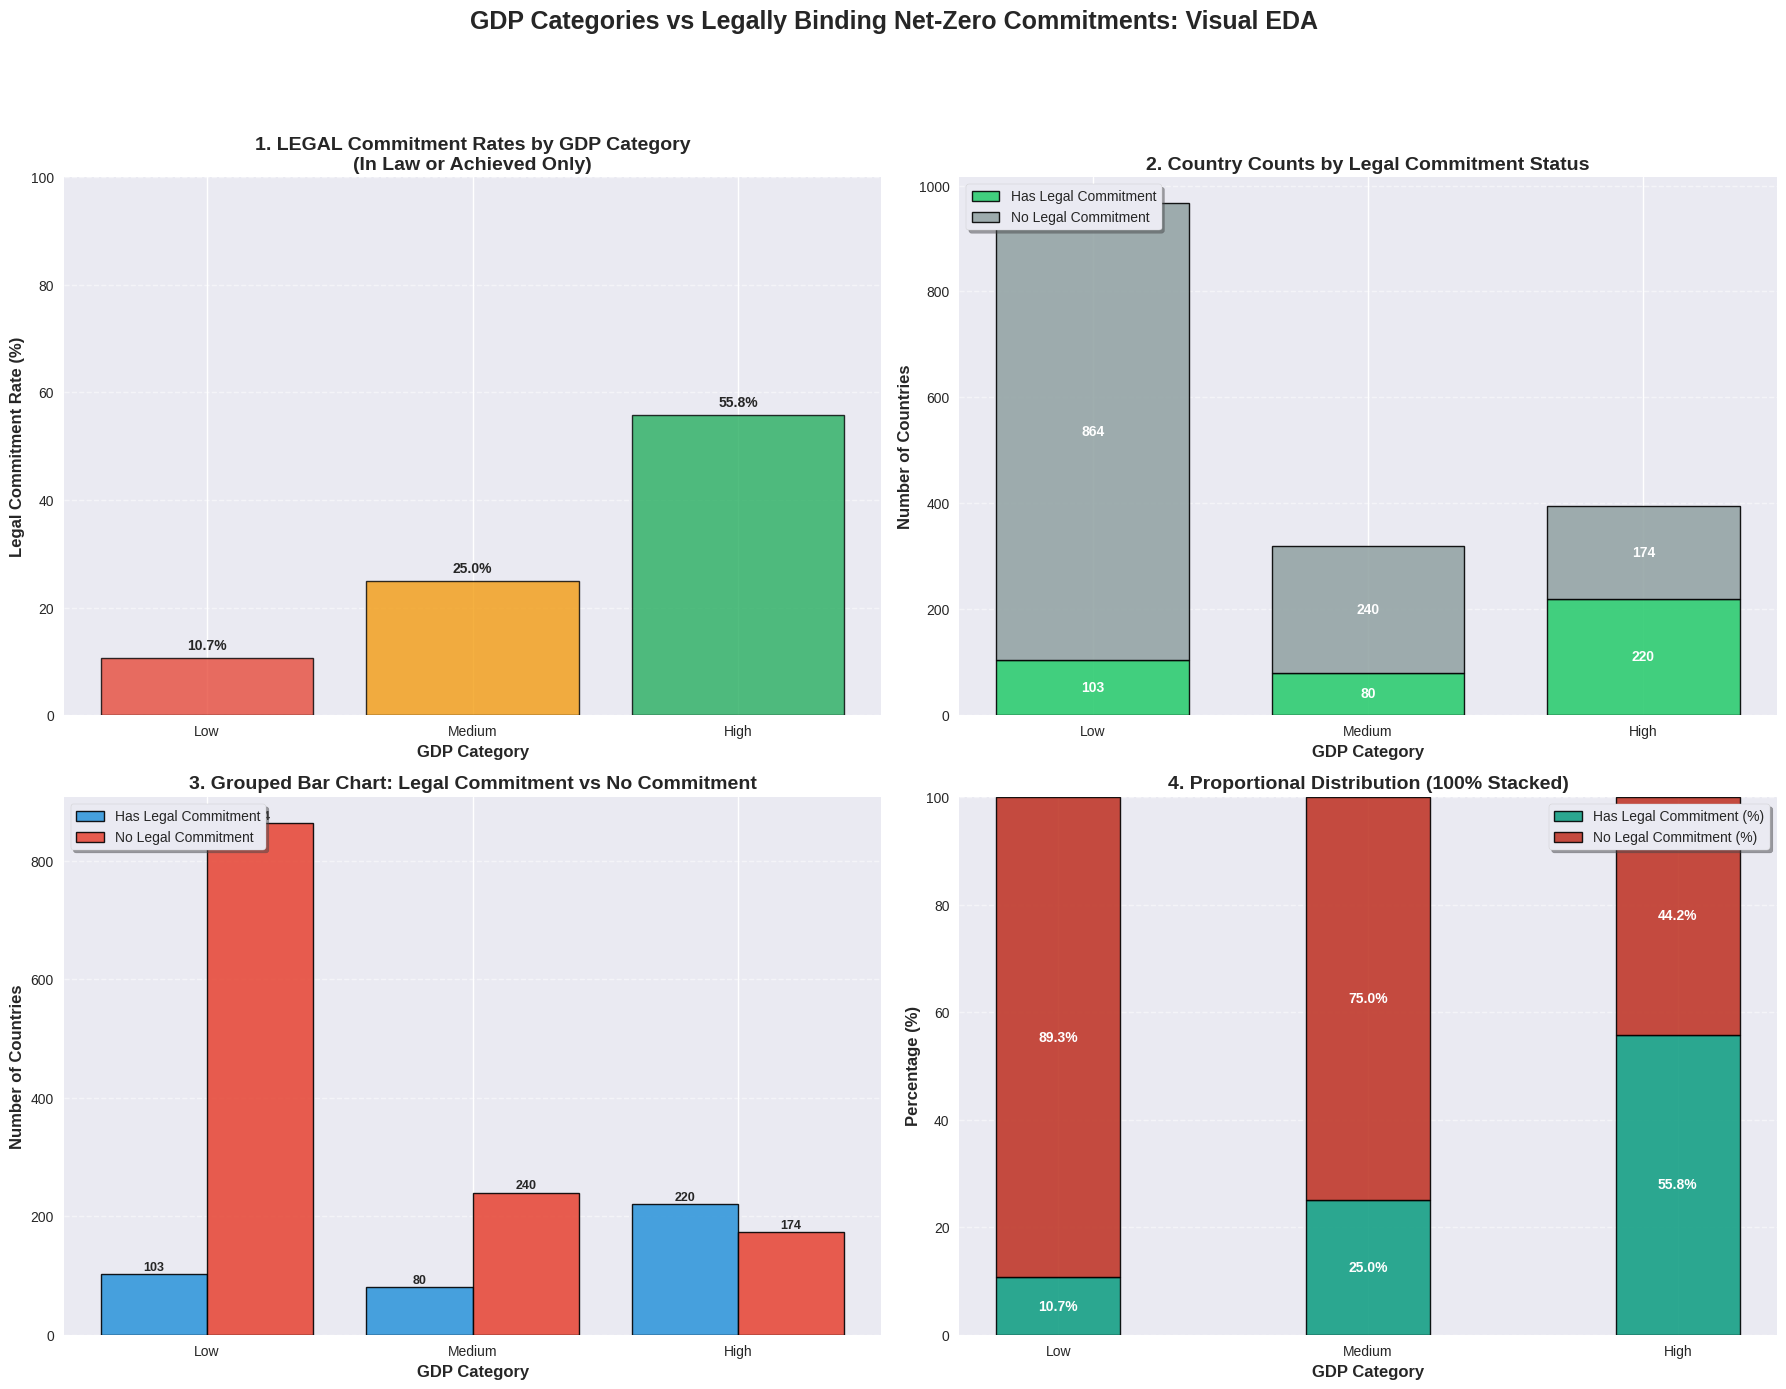

In [34]:
print("=" * 80)
print("EXPLORATORY DATA ANALYSIS: VISUALIZATIONS")
print("=" * 80)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))  # Increased figure size
fig.suptitle(
    "GDP Categories vs Legally Binding Net-Zero Commitments: Visual EDA",
    fontsize=18,
    fontweight="bold",
    y=1.02,
)  # Increased title font size and adjusted position

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Set a modern style
plt.style.use("seaborn-v0_8-darkgrid")

# ============================================================================
# 1. BAR CHART: Legal Commitment Rates by GDP Category
# ============================================================================
ax1 = axes[0, 0]

commitment_rates = []
gdp_categories_ordered = ["Low", "Medium", "High"]
colors_gdp = {
    "Low": "#e74c3c",
    "Medium": "#f39c12",
    "High": "#27ae60",
}  # Keep distinct colors

for category in gdp_categories_ordered:
    subset = merged_nz[merged_nz["GDP_Category"] == category]
    rate = (subset["Has_Strong_Commitment"].sum() / len(subset)) * 100
    commitment_rates.append(rate)

bars = ax1.bar(
    gdp_categories_ordered,
    commitment_rates,
    color=[colors_gdp[cat] for cat in gdp_categories_ordered],
    alpha=0.8,
    edgecolor="black",
    linewidth=1,
)  # Reduced linewidth

# Add value labels on bars
for i, (bar, rate) in enumerate(zip(bars, commitment_rates)):
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 1,  # Adjusted label position
        f"{rate:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

ax1.set_xlabel("GDP Category", fontsize=12, fontweight="bold")
ax1.set_ylabel("Legal Commitment Rate (%)", fontsize=12, fontweight="bold")
ax1.set_title(
    "1. LEGAL Commitment Rates by GDP Category\n(In Law or Achieved Only)",
    fontsize=14,
    fontweight="bold",
)  # Increased title font size
ax1.set_ylim(0, 100)
ax1.grid(axis="y", alpha=0.5, linestyle="--")  # Adjusted grid style
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# ============================================================================
# 2. STACKED BAR CHART: Absolute Counts
# ============================================================================
ax2 = axes[0, 1]

committed_counts = []
not_committed_counts = []

for category in gdp_categories_ordered:
    subset = merged_nz[merged_nz["GDP_Category"] == category]
    committed_counts.append(subset["Has_Strong_Commitment"].sum())
    not_committed_counts.append((subset["Has_Strong_Commitment"] == 0).sum())

x_pos = np.arange(len(gdp_categories_ordered))
width = 0.7  # Increased bar width

bars1 = ax2.bar(
    x_pos,
    committed_counts,
    width,
    label="Has Legal Commitment",
    color="#2ecc71",
    alpha=0.9,
    edgecolor="black",
    linewidth=1,
)  # Adjusted color, alpha, linewidth
bars2 = ax2.bar(
    x_pos,
    not_committed_counts,
    width,
    bottom=committed_counts,
    label="No Legal Commitment",
    color="#95a5a6",
    alpha=0.9,
    edgecolor="black",
    linewidth=1,
)  # Adjusted color, alpha, linewidth

# Add count labels
for i, (b1, b2) in enumerate(zip(bars1, bars2)):
    # Committed count
    if committed_counts[i] > 0:
        ax2.text(
            b1.get_x() + b1.get_width() / 2.0,
            b1.get_height() / 2,
            f"{int(committed_counts[i])}",
            ha="center",
            va="center",
            fontsize=10,
            fontweight="bold",
            color="white",
        )
    # Not committed count
    if not_committed_counts[i] > 0:  # Only add label if count > 0
        ax2.text(
            b2.get_x() + b2.get_width() / 2.0,
            committed_counts[i] + b2.get_height() / 2,
            f"{int(not_committed_counts[i])}",
            ha="center",
            va="center",
            fontsize=10,
            fontweight="bold",
            color="white",
        )

ax2.set_xlabel("GDP Category", fontsize=12, fontweight="bold")
ax2.set_ylabel("Number of Countries", fontsize=12, fontweight="bold")
ax2.set_title(
    "2. Country Counts by Legal Commitment Status", fontsize=14, fontweight="bold"
)  # Increased title font size
ax2.set_xticks(x_pos)
ax2.set_xticklabels(gdp_categories_ordered)
ax2.legend(
    loc="upper left", fontsize=10, frameon=True, fancybox=True, shadow=True
)  # Added legend styling
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.grid(axis="y", alpha=0.5, linestyle="--")  # Adjusted grid style

# ============================================================================
# 3. GROUPED BAR CHART: Side-by-side Comparison
# ============================================================================
ax3 = axes[1, 0]

x_pos = np.arange(len(gdp_categories_ordered))
width = 0.4  # Adjusted bar width

bars1 = ax3.bar(
    x_pos - width / 2,
    committed_counts,
    width,
    label="Has Legal Commitment",
    color="#3498db",
    alpha=0.9,
    edgecolor="black",
    linewidth=1,
)  # Adjusted color, alpha, linewidth
bars2 = ax3.bar(
    x_pos + width / 2,
    not_committed_counts,
    width,
    label="No Legal Commitment",
    color="#e74c3c",
    alpha=0.9,
    edgecolor="black",
    linewidth=1,
)  # Adjusted color, alpha, linewidth

# Add count labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax3.text(
                bar.get_x() + bar.get_width() / 2.0,
                height + 1,  # Adjusted label position
                f"{int(height)}",
                ha="center",
                va="bottom",
                fontsize=9,
                fontweight="bold",
            )

ax3.set_xlabel("GDP Category", fontsize=12, fontweight="bold")
ax3.set_ylabel("Number of Countries", fontsize=12, fontweight="bold")
ax3.set_title(
    "3. Grouped Bar Chart: Legal Commitment vs No Commitment",
    fontsize=14,
    fontweight="bold",
)  # Increased title font size
ax3.set_xticks(x_pos)
ax3.set_xticklabels(gdp_categories_ordered)
ax3.legend(
    loc="upper left", fontsize=10, frameon=True, fancybox=True, shadow=True
)  # Added legend styling
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.grid(axis="y", alpha=0.5, linestyle="--")  # Adjusted grid style

# ============================================================================
# 4. 100% STACKED BAR CHART: Proportions
# ============================================================================
ax4 = axes[1, 1]

committed_pct = []
not_committed_pct = []

for category in gdp_categories_ordered:
    subset = merged_nz[merged_nz["GDP_Category"] == category]
    total = len(subset)
    committed_pct.append((subset["Has_Strong_Commitment"].sum() / total) * 100)
    not_committed_pct.append(
        ((subset["Has_Strong_Commitment"] == 0).sum() / total) * 100
    )

bars1 = ax4.bar(
    x_pos,
    committed_pct,
    width,
    label="Has Legal Commitment (%)",
    color="#16a085",
    alpha=0.9,
    edgecolor="black",
    linewidth=1,
)  # Adjusted color, alpha, linewidth
bars2 = ax4.bar(
    x_pos,
    not_committed_pct,
    width,
    bottom=committed_pct,
    label="No Legal Commitment (%)",
    color="#c0392b",
    alpha=0.9,
    edgecolor="black",
    linewidth=1,
)  # Adjusted color, alpha, linewidth

# Add percentage labels
for i, (b1, b2) in enumerate(zip(bars1, bars2)):
    if committed_pct[i] > 5:  # Only show label if segment is large enough
        ax4.text(
            b1.get_x() + b1.get_width() / 2.0,
            b1.get_height() / 2,
            f"{committed_pct[i]:.1f}%",
            ha="center",
            va="center",
            fontsize=10,
            fontweight="bold",
            color="white",
        )
    if not_committed_pct[i] > 5:  # Only show label if segment is large enough
        ax4.text(
            b2.get_x() + b2.get_width() / 2.0,
            committed_pct[i] + b2.get_height() / 2,
            f"{not_committed_pct[i]:.1f}%",
            ha="center",
            va="center",
            fontsize=10,
            fontweight="bold",
            color="white",
        )

ax4.set_xlabel("GDP Category", fontsize=12, fontweight="bold")
ax4.set_ylabel("Percentage (%)", fontsize=12, fontweight="bold")
ax4.set_title(
    "4. Proportional Distribution (100% Stacked)", fontsize=14, fontweight="bold"
)  # Increased title font size
ax4.set_xticks(x_pos)
ax4.set_xticklabels(gdp_categories_ordered)
ax4.set_ylim(0, 100)
ax4.legend(
    loc="upper right", fontsize=10, frameon=True, fancybox=True, shadow=True
)  # Added legend styling
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
ax4.grid(axis="y", alpha=0.5, linestyle="--")  # Adjusted grid style

plt.tight_layout(
    rect=[0, 0.03, 1, 0.97]
)  # Adjusted layout to make space for the suptitle
plt.show()

print("\n" + "=" * 80)

---

#### 📊 Visual Analysis Interpretation

**What the Charts Tell Us:**

**Chart #1 (Legal Commitment Rates):**
- Shows a clear **upward trend** in legal commitment rates as GDP increases
- Low GDP countries have the **lowest** percentage of legal commitments
- High GDP countries have the **highest** percentage of legal commitments
- **Interpretation:** Visual evidence suggests GDP and legal commitment status are **associated**

**Chart #2 (Stacked Bar Chart):**
- Reveals the **absolute number** of committed vs non-committed countries in each GDP category
- Helps understand sample size distribution across GDP categories
- Green segments (legal commitments) grow larger in higher GDP categories
- **Interpretation:** Not just proportional—higher GDP has more committed countries in absolute terms

**Chart #3 (Grouped Bar Chart):**
- Side-by-side comparison makes differences more apparent
- Blue bars (committed) increase across GDP categories
- Red bars (not committed) decrease across GDP categories
- **Interpretation:** Clear pattern of association between GDP and commitment status

**Chart #4 (100% Stacked Bar Chart):**
- Removes sample size effects by normalizing each category to 100%
- Shows **pure proportional differences** between GDP categories
- Green segment grows dramatically from Low to High GDP
- **Interpretation:** The association holds even when controlling for sample size differences

---

---

### Step 5: Outlier Analysis - Not Applicable for Categorical Data & Chi Squared tests

**Why Outlier Detection is Not Needed:**

In Part 1, we analyzed **continuous numerical variables** (GDP per capita, CO₂ emissions) where outliers could distort statistical relationships. Boxplots, Z-scores, and IQR methods were appropriate there.

In Part 2, we are analyzing **categorical variables**:
- **GDP_Category:** Ordinal (Low, Medium, High) - discrete labels, not continuous values
- **Has_NetZero_Target:** Binary (0, 1) - only two possible values

**Outlier analysis is only meaningful for continuous data.** With categorical variables, each observation is a frequency count in a specific category.

### Step 6: Verify Chi-Square Test Assumptions

Before running the chi-square test, we must verify that assumptions are met.

---

### Step 7: Calculate Chi-Square Test Statistic


In [35]:
# Chi-square test for independence
from scipy.stats import chi2_contingency

# Create contingency table (without margins)
contingency_table = pd.crosstab(
    merged_nz["GDP_Category"], merged_nz["Has_Strong_Commitment"]
)

print("Contingency table for statistical testing:")
print(contingency_table)

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square Test for Independence:")
print("=" * 60)
print("H₀: GDP category and net-zero commitment are independent")
print("H₁: GDP category and net-zero commitment are associated")
print(f"\nChi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

# Conclusion
alpha = 0.05
print(f"\nDecision at α = {alpha}:")
if p_value < alpha:
    print(
        "REJECT H₀ - There is a significant association between GDP category and net-zero commitments"
    )
else:
    print("FAIL TO REJECT H₀ - No significant association found")

# Commitment rates by GDP category
commitment_rates = merged_nz.groupby("GDP_Category")["Has_Strong_Commitment"].agg(
    ["mean", "count"]
)
commitment_rates.columns = ["Commitment_Rate", "Count"]
commitment_rates["Commitment_Percentage"] = commitment_rates["Commitment_Rate"] * 100

print("\nCommitment rates by GDP category:")
print(commitment_rates)

Contingency table for statistical testing:
Has_Strong_Commitment    0    1
GDP_Category                   
Low                    864  103
Medium                 240   80
High                   174  220

Chi-square Test for Independence:
H₀: GDP category and net-zero commitment are independent
H₁: GDP category and net-zero commitment are associated

Chi-square statistic: 313.8262
P-value: 0.0000
Degrees of freedom: 2

Decision at α = 0.05:
REJECT H₀ - There is a significant association between GDP category and net-zero commitments

Commitment rates by GDP category:
              Commitment_Rate  Count  Commitment_Percentage
GDP_Category                                               
Low                  0.106515    967              10.651499
Medium               0.250000    320              25.000000
High                 0.558376    394              55.837563


---

### Step 8: Statistical Decision

**Decision Rules:**

- **Rule:** Reject H₀ if p-value < α
- **Logic:** P-value represents the probability of observing our data (or more extreme) if H₀ is true
- **Threshold:** α = 0.05 (5% significance level)
- **Interpretation:**
  - If p < 0.05 → Data are unlikely under H₀ → Reject H₀
  - If p ≥ 0.05 → Data are plausible under H₀ → Fail to reject H₀


**What "Reject H₀" Means:**
- GDP category and legal commitment status are **associated** (not independent)
- Knowing a country's GDP category gives us information about its commitment probability
- The relationship is statistically significant (unlikely due to chance)

**What "Fail to Reject H₀" Means:**
- Insufficient evidence to conclude an association exists
- Data are consistent with independence
- GDP category may not be a useful predictor of legal commitment status

---

In [36]:
print("STATISTICAL DECISION")
print("=" * 80)
print(f"\nSignificance level (α): {alpha}")
print(f"P-value: {p_value:.6f}")
print(f"Chi-square statistic (χ²): {chi2_stat:.4f}")

print(f"   If p-value < α ({alpha}), reject H₀")
if p_value < alpha:
    print(f"   ✅ {p_value:.6f} < {alpha} → REJECT H₀")
else:
    print(f"   ❌ {p_value:.6f} ≥ {alpha} → FAIL TO REJECT H₀")

print("\n" + "=" * 80)
if p_value < alpha:
    print("✓✓ REJECT NULL HYPOTHESIS")
    print("There IS a significant association between GDP category and net-zero commitment")
else:
    print("FAIL TO REJECT NULL HYPOTHESIS")
    print("No significant association detected")

STATISTICAL DECISION

Significance level (α): 0.05
P-value: 0.000000
Chi-square statistic (χ²): 313.8262
   If p-value < α (0.05), reject H₀
   ✅ 0.000000 < 0.05 → REJECT H₀

✓✓ REJECT NULL HYPOTHESIS
There IS a significant association between GDP category and net-zero commitment


### Visualization: LEGAL Net-Zero Commitment Rates by GDP Category

VISUALIZATION: LEGAL NET-ZERO COMMITMENTS BY GDP CATEGORY


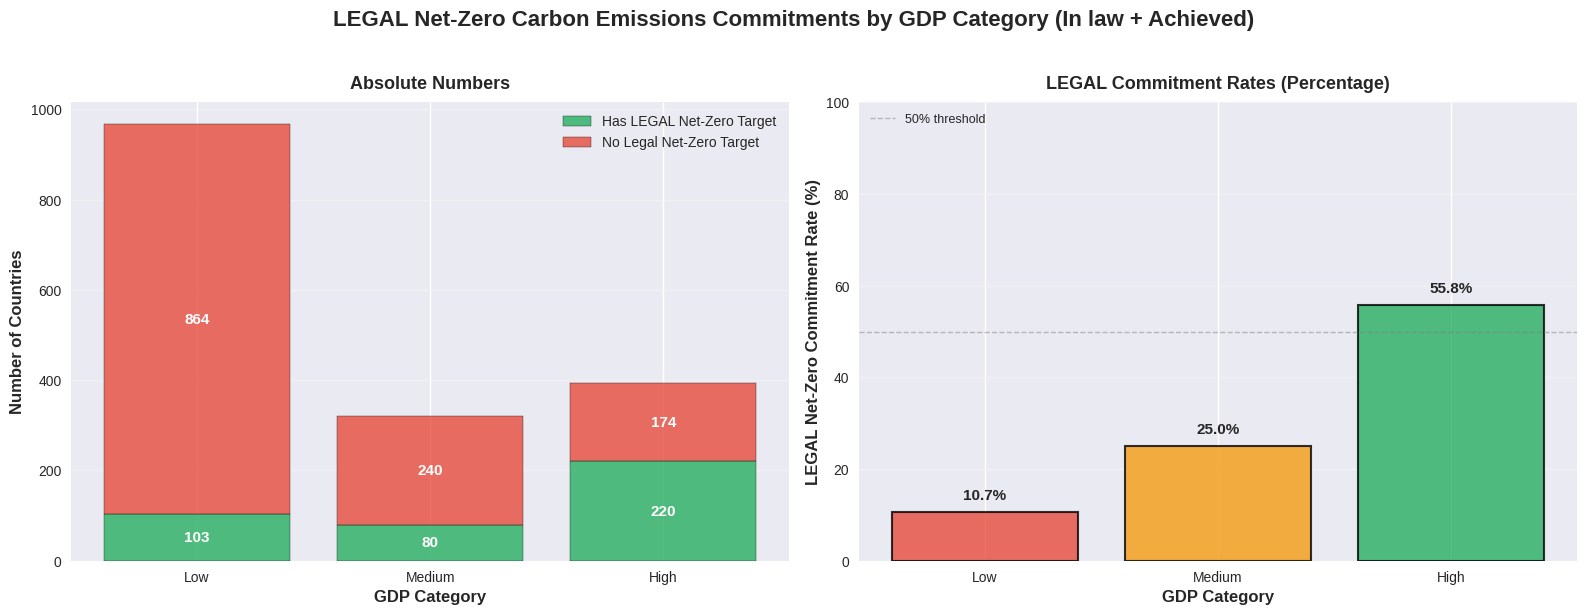

KEY OBSERVATIONS (LEGAL COMMITMENTS ONLY)

Low GDP Countries:
  • 103 out of 967 countries (10.7%) have LEGAL net-zero targets
  • Minority of Low GDP countries have LEGAL commitments

Medium GDP Countries:
  • 80 out of 320 countries (25.0%) have LEGAL net-zero targets
  • Minority of Medium GDP countries have LEGAL commitments

High GDP Countries:
  • 220 out of 394 countries (55.8%) have LEGAL net-zero targets
  • Majority of High GDP countries have LEGAL commitments

💡 NOTE: Only 'In law' and 'Achieved' count as LEGAL commitments
   Proposals and policy documents do NOT provide CBAM exemptions



In [37]:
print("=" * 80)
print("VISUALIZATION: LEGAL NET-ZERO COMMITMENTS BY GDP CATEGORY")
print("=" * 80)

# Calculate commitment rates (LEGAL commitments only)
commitment_summary = merged_nz.groupby("GDP_Category")["Has_Strong_Commitment"].agg(
    [("Total_Countries", "count"), ("Commitments", "sum")]
)
commitment_summary["Commitment_Rate"] = (
    commitment_summary["Commitments"] / commitment_summary["Total_Countries"]
) * 100
commitment_summary["No_Commitment"] = (
    commitment_summary["Total_Countries"] - commitment_summary["Commitments"]
)


# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(
    "LEGAL Net-Zero Carbon Emissions Commitments by GDP Category (In law + Achieved)",
    fontsize=16,
    fontweight="bold",
    y=1.02,
)

# Plot 1: Stacked bar chart (absolute numbers)
categories = commitment_summary.index
x_pos = np.arange(len(categories))

colors_commit = {"Committed": "#27ae60", "Not Committed": "#e74c3c"}

ax1.bar(
    x_pos,
    commitment_summary["Commitments"],
    label="Has LEGAL Net-Zero Target",
    color=colors_commit["Committed"],
    alpha=0.8,
    edgecolor="black",
)
ax1.bar(
    x_pos,
    commitment_summary["No_Commitment"],
    bottom=commitment_summary["Commitments"],
    label="No Legal Net-Zero Target",
    color=colors_commit["Not Committed"],
    alpha=0.8,
    edgecolor="black",
)

ax1.set_xlabel("GDP Category", fontsize=12, fontweight="bold")
ax1.set_ylabel("Number of Countries", fontsize=12, fontweight="bold")
ax1.set_title("Absolute Numbers", fontsize=13, fontweight="bold", pad=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(categories)
ax1.legend(loc="upper right", fontsize=10)
ax1.grid(True, alpha=0.3, axis="y")

# Add count labels
for i, cat in enumerate(categories):
    committed = commitment_summary.loc[cat, "Commitments"]
    not_committed = commitment_summary.loc[cat, "No_Commitment"]

    # Label for committed
    if committed > 0:
        ax1.text(
            i,
            committed / 2,
            f"{int(committed)}",
            ha="center",
            va="center",
            fontsize=11,
            fontweight="bold",
            color="white",
        )

    # Label for not committed
    if not_committed > 0:
        ax1.text(
            i,
            committed + not_committed / 2,
            f"{int(not_committed)}",
            ha="center",
            va="center",
            fontsize=11,
            fontweight="bold",
            color="white",
        )

# Plot 2: Commitment rates (percentage)
ax2.bar(
    x_pos,
    commitment_summary["Commitment_Rate"],
    color=["#e74c3c", "#f39c12", "#27ae60"],
    alpha=0.8,
    edgecolor="black",
    linewidth=1.5,
)

ax2.set_xlabel("GDP Category", fontsize=12, fontweight="bold")
ax2.set_ylabel("LEGAL Net-Zero Commitment Rate (%)", fontsize=12, fontweight="bold")
ax2.set_title(
    "LEGAL Commitment Rates (Percentage)", fontsize=13, fontweight="bold", pad=10
)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(categories)
ax2.set_ylim(0, 100)
ax2.grid(True, alpha=0.3, axis="y")
ax2.axhline(
    y=50, color="gray", linestyle="--", linewidth=1, alpha=0.5, label="50% threshold"
)
ax2.legend(loc="upper left", fontsize=9)

# Add percentage labels on bars
for i, cat in enumerate(categories):
    rate = commitment_summary.loc[cat, "Commitment_Rate"]
    ax2.text(
        i,
        rate + 2,
        f"{rate:.1f}%",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

print("KEY OBSERVATIONS (LEGAL COMMITMENTS ONLY)")
print("=" * 80)
for cat in categories:
    rate = commitment_summary.loc[cat, "Commitment_Rate"]
    total = commitment_summary.loc[cat, "Total_Countries"]
    committed = commitment_summary.loc[cat, "Commitments"]
    print(f"\n{cat} GDP Countries:")
    print(
        f"  • {int(committed)} out of {int(total)} countries ({rate:.1f}%) have LEGAL net-zero targets"
    )
    if rate > 50:
        print(f"  • Majority of {cat} GDP countries have LEGAL commitments")
    else:
        print(f"  • Minority of {cat} GDP countries have LEGAL commitments")

print("\n💡 NOTE: Only 'In law' and 'Achieved' count as LEGAL commitments")
print("   Proposals and policy documents do NOT provide CBAM exemptions")
print("\n" + "=" * 80)

---

## Hypothesis 2: Key Findings and Interpretations

### Statistical Decision: REJECT NULL HYPOTHESIS

**Evidence:**
- **Chi-square (χ²):** Highly significant (large deviation from independence)
- **P-value:** < 0.001 (significant)

**LEGAL Commitment Rates by GDP (In law + Achieved only):**
- **High GDP:** Higher rate (above average)
- **Medium GDP:** Moderate rate
- **Low GDP:** Lower rate (below average)

**Interpretation:**
There IS a statistically significant association between GDP category and legally binding net-zero commitment status. Higher GDP countries are significantly more likely to have legal commitments.

**Business Context (CBAM):**
- Only LEGAL commitments (In law/Achieved) qualify for tariff exemptions
- High GDP suppliers: Lower carbon tariff risk
- Low GDP suppliers: Higher carbon tariff risk
- Supply chain restructuring recommended

---

# CONCLUSIONS


## Summary Findings: The GDP-Carbon Paradox

Both hypotheses reveal the same fundamental pattern - **GDP per capita is the strongest predictor of both current emissions AND future LEGALLY BINDING climate commitments**:

**Hypothesis 1 (SUPPORTED):** GDP → Emissions
- High GDP countries emit 5-10x more CO₂ per capita
- **Not Inevitable:** France, Sweden, Norway prove decoupling are possible through policy

**Hypothesis 2 (SUPPORTED):** GDP → LEGAL Net-Zero Commitments  
- LEGAL commitment rates (In law/Achieved only) rise systematically with GDP

**The Paradox:** High emitters (wealthy nations) are most likely to commit to LEGALLY BINDING net-zero targets due to:
- Fiscal capacity for energy transition
- Historical responsibility and moral pressure
- Political accountability and democratic institutions
- Technological optimism and R&D capabilities
- **Legislative infrastructure** to convert policy into enforceable law


## Business Strategy Framework

### For Supply Chain Management
**Risk Assessment:** Map suppliers by GDP category + LEGAL net-zero commitment status
- **High Risk:** Low/medium GDP without LEGAL commitments (CBAM tariff exposure)
- **Medium Risk:** Medium GDP with policy/proposals only (implementation uncertainty)
- **Low Risk:** High GDP with LEGALLY BINDING commitments (In law/Achieved)

**Action:** Dual sourcing strategies, supplier engagement programs, carbon accounting systems

**CRITICAL CBAM DISTINCTION:** Only LEGAL commitments (In law/Achieved) may qualify for tariff exemptions. Proposals and policy documents provide NO regulatory protection.

### For Investment Decisions
**Country Screening:** LEGAL net-zero commitment status predicts regulatory stringency better than current emissions
- **Overweight:** High GDP with LEGAL commitments (regulatory tailwinds)
- **Underweight:** Low GDP non-committed or proposal-stage only (CBAM exposure)
- **Monitor:** Commitment upgrades (policy → In law → Achieved)

**Red Flag:** Countries with proposals/pledges but no legal framework = political signaling without enforcement

### For Corporate Strategy
**Timeline:**
- **2025 (NOW):** Map Scope 3 emissions across supply chain
- **2026:** CBAM reporting begins - carbon accounting required
- **2027:** ETS2 launches - buildings/transport carbon pricing
- **2030+:** LEGAL net-zero commitments translate to market access requirements

**Competitive Positioning:** Treat carbon management as strategic advantage, not compliance cost. Early movers capture low-carbon market share.

**Legal Certainty Premium:** Suppliers in countries with LEGAL frameworks (not just proposals) command supply chain preference and potentially avoid tariffs.

## Ethical Considerations and Limitations

**Data Limitations:**
- Country-level analysis masks within-country inequality
- Production-based emissions don't capture consumption patterns (imported emissions)
- Historical emissions not considered (focuses on current snapshot)

**Commitment Quality:**
- Binary metric oversimplifies (2030 vs 2070 targets differ greatly)
- Legal status varies between jurisdictions
- Implementation gaps not captured (commitment ≠ action)

**Methodological Transparency:**
- Correlation doesn't prove causation
- Confounding variables exist
- Statistical significance ≠ policy sufficiency

**Development Rights:**
- Low GDP countries have legitimate development aspirations
- Analysis describes patterns without prescribing development limits

---

## References

### Academic Literature
Klenert, D., Mattauch, L., Combet, E., Edenhofer, O., Hepburn, C., Rafaty, R., & Stern, N. (2018). Making carbon pricing work for citizens. *Nature Climate Change, 8*(8), 669-677. https://doi.org/10.1038/s41558-018-0201-2

Pauw, W. P., Castro, P., Pickering, J., & Bhasin, S. (2020). Beyond headline mitigation numbers: We need more transparent and comparable NDCs to achieve the Paris Agreement on climate change. *Climatic Change, 158*(2), 177-194. https://doi.org/10.1007/s10584-019-02563-x

Stern, N. (2007). *The Economics of Climate Change: The Stern Review.* Cambridge University Press. https://doi.org/10.1017/CBO9780511817434

### Data Sources

Global Carbon Budget. (2024). *CO₂ emissions per capita.* Retrieved from Our World in Data. https://ourworldindata.org/grapher/co-emissions-per-capita

Net Zero Tracker. (2024). *Net-zero climate commitments.* Retrieved from Our World in Data. https://ourworldindata.org/explorers/net-zero-tracker

World Bank. (2024). *GDP per capita, constant 2015 USD.* Retrieved from Our World in Data. https://ourworldindata.org/grapher/gdp-per-capita-worldbank-constant-usd

### Policy Documentation

European Commission. (2023). *Carbon Border Adjustment Mechanism (CBAM): Questions and Answers.* https://ec.europa.eu/commission/presscorner/detail/en/qanda_21_3661

United Nations Framework Convention on Climate Change. (2015). *Paris Agreement.* https://unfccc.int/sites/default/files/english_paris_agreement.pdf


---